In [2]:
import pandas as pd

data = pd.read_csv('car data.csv')

print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [3]:
print(data.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [4]:
data_encoded = pd.get_dummies(data)
print(data_encoded.head())


   Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Name_800  \
0  2014           3.35           5.59       27000      0             0   
1  2013           4.75           9.54       43000      0             0   
2  2017           7.25           9.85        6900      0             0   
3  2011           2.85           4.15        5200      0             0   
4  2014           4.60           6.87       42450      0             0   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   Car_Name_Bajaj Avenger 150  ...  Car_Name_vitara brezza  Car_Name_wagon r  \
0                           0  ...                       0  

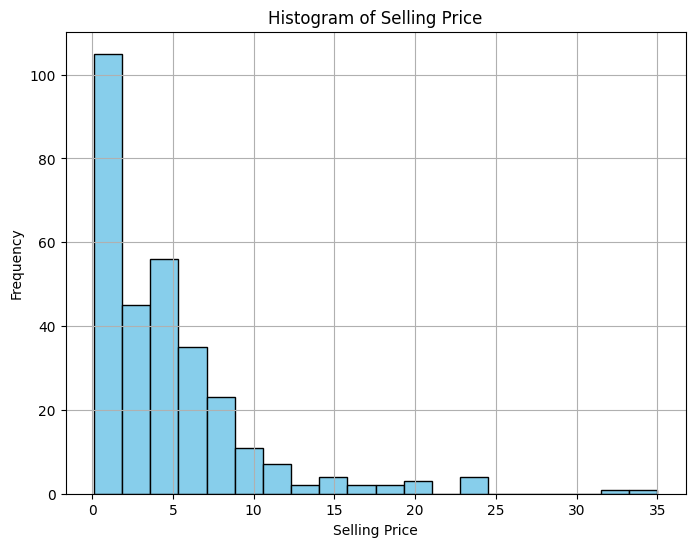

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['Selling_Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-15-99ff32113c80>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, palette='Set2')


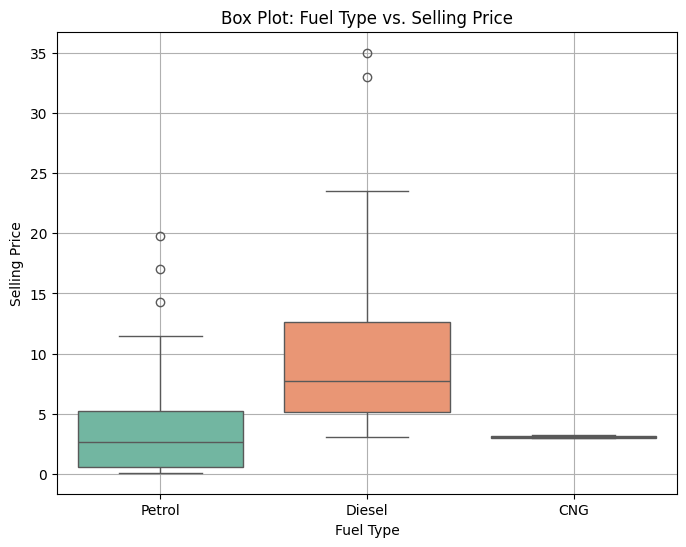

In [15]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, palette='Set2')
plt.title('Box Plot: Fuel Type vs. Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(['Selling_Price'], axis=1)
y = data_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [8]:
model.fit(X_train, y_train)


LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 1.1038430037284932


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_

predictions = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error: 0.5955921644526584


In [13]:
feature_names = X.columns.tolist()

new_data_encoded = pd.get_dummies(new_data)

new_data_aligned = new_data_encoded.reindex(columns=feature_names, fill_value=0)

predicted_price = best_rf_model.predict(new_data_aligned)
print("Predicted Selling Price:", predicted_price)


Predicted Selling Price: [3.07293056]
